   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

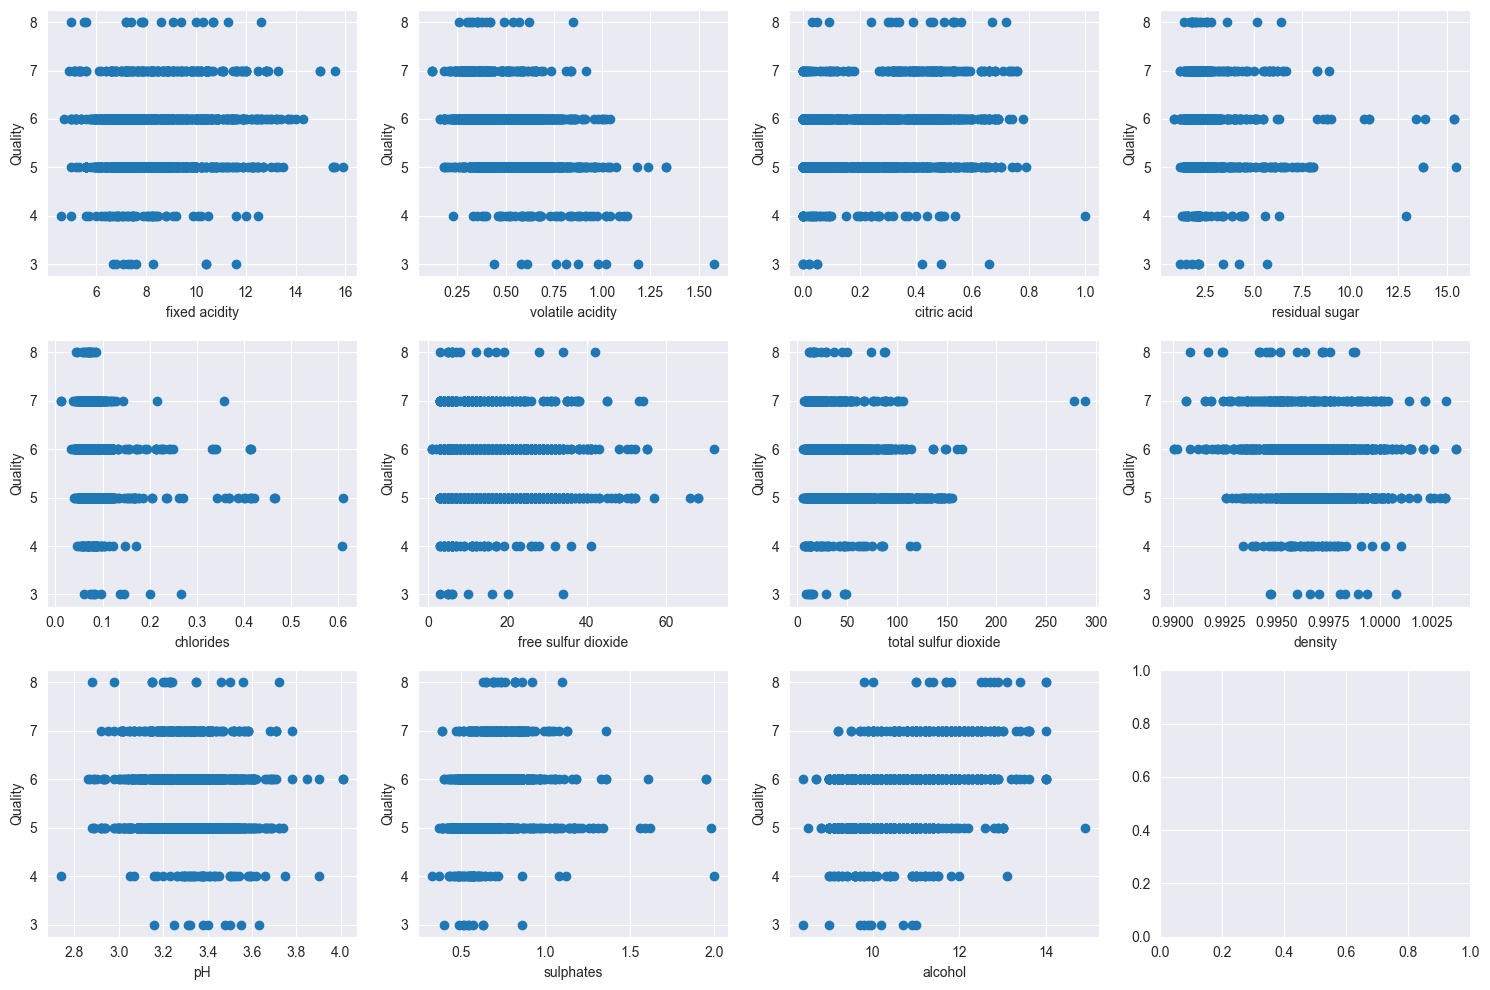

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None) 

# Load the dataset
red_df = pd.read_csv('winequality-red.csv')
print(red_df.head())

# Check for null values and dataset info
print(red_df.isnull().sum())
print(red_df.info())

# Scatter plots to explore feature relationships with target variable
X = red_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'density', 'pH', 'sulphates', 'alcohol']]
Y = red_df['quality']

fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs = axs.flatten()

# Scatter plot for each feature
for i, (column, ax) in enumerate(zip(X.columns, axs)):
    ax.scatter(X[column], Y)
    ax.set_xlabel(column)
    ax.set_ylabel('Quality')

plt.tight_layout()
plt.show()


In [2]:

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:

# Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Predictions
y_pred = regressor.predict(X_test)
print("Predictions:", y_pred)


Coefficients: [ 0.03746059 -0.18170837 -0.02616077  0.01250312 -0.08661258  0.05133664
 -0.12063671 -0.02987597 -0.05303269  0.14359811  0.30301729]
Intercept: 5.6271893244370315
Predictions: [5.34360227 5.06294956 5.63333204 5.45176186 5.74570371 5.27637941
 5.03060591 5.14548634 5.74793413 5.71379639 6.14292388 5.25602325
 5.55746352 5.25516748 5.44918167 6.50428691 5.16155023 5.58177831
 6.56354719 5.31109369 5.42314936 5.19226562 5.99245498 6.40578182
 5.36515018 5.42441564 6.35376721 5.37618609 5.16180078 6.16014475
 5.25888679 5.538378   5.7525049  5.3863994  5.45667328 5.02911082
 6.1905284  5.71266674 5.63463533 6.20179362 5.50279355 5.24191583
 6.16908347 5.15779342 5.85212953 5.8169982  6.415135   5.57902528
 5.16752006 5.57681837 5.12302477 5.08832659 5.6067245  6.37829292
 4.96528844 4.97488594 6.03283966 5.4259819  5.86156997 5.26390122
 5.60706205 5.97031204 5.28379018 5.32034058 6.50607979 5.41422594
 6.36327206 5.25281218 6.43657812 5.30042793 6.45787251 4.75051838
 5.7

In [4]:

# Model Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Adjusted R-squared
n = len(Y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
print("Adjusted R-squared:", adjusted_r2)


Mean Absolute Error (MAE): 0.49987991229254464
Mean Squared Error (MSE): 0.38830173868689216
Root Mean Squared Error (RMSE): 0.6231386191586044
R-squared (R2): 0.3722831200818111
Adjusted R-squared: 0.3544870229707283


In [5]:

# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [1, 2, 3, 4, 5, 10, 20, 50, 100]}
ridgecv = GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train, Y_train)
ridge_pred = ridgecv.predict(X_test)

print("Best Ridge Parameter:", ridgecv.best_params_)
print("Ridge Predictions:", ridge_pred)
print("R2 (Ridge):", r2_score(Y_test, ridge_pred))


Best Ridge Parameter: {'alpha': 100}
Ridge Predictions: [5.33469654 5.11135517 5.60222132 5.44367415 5.7465762  5.29730472
 5.073682   5.17935178 5.75983469 5.7118094  6.12043642 5.28936039
 5.55094976 5.26601669 5.47714592 6.48090589 5.18173685 5.58775416
 6.51895831 5.3208097  5.43219569 5.218495   5.98761627 6.35411535
 5.37195509 5.44200362 6.28779207 5.39948982 5.18215006 6.15094151
 5.27924016 5.56161256 5.7456348  5.41281194 5.44258481 5.07085812
 6.19196362 5.71441628 5.65034112 6.19440215 5.52928828 5.25293826
 6.13436073 5.17561969 5.8538452  5.79617533 6.38008709 5.59129499
 5.20794496 5.57346091 5.12656387 5.12013313 5.59673381 6.33317578
 5.0303981  5.01545595 6.01972288 5.45658093 5.85022393 5.30146222
 5.57260935 5.95413317 5.32469963 5.37155768 6.46898033 5.45125395
 6.3611045  5.26361488 6.3968117  5.32367169 6.42467316 4.8170641
 5.78201899 5.84031989 6.18296141 5.30680652 6.73590713 5.87538832
 6.10176835 6.42531282 5.35048428 6.42590127 5.44446502 5.68704837
 5.6987

In [6]:

# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, Y_train)
lasso_pred = lasso_cv.predict(X_test)

print("Best Lasso Parameter:", lasso_cv.best_params_)
print("Lasso Predictions:", lasso_pred)
print("R2 (Lasso):", r2_score(Y_test, lasso_pred))


Best Lasso Parameter: {'alpha': 1}
Lasso Predictions: [5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932 5.62718932
 5.62718

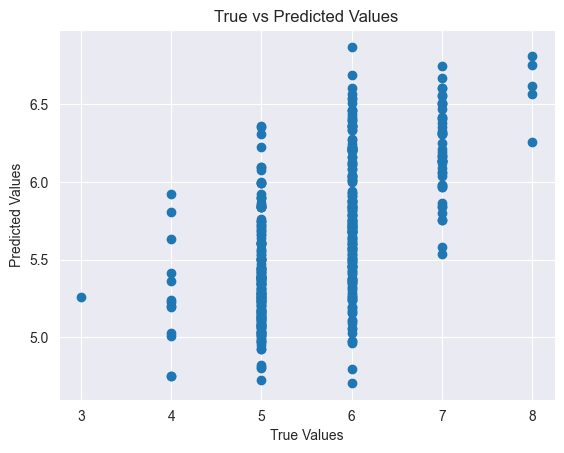

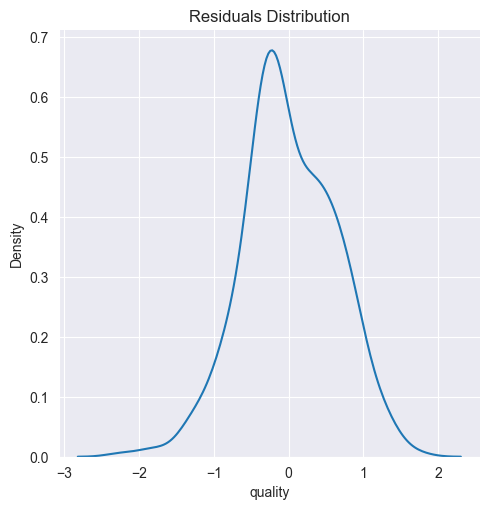

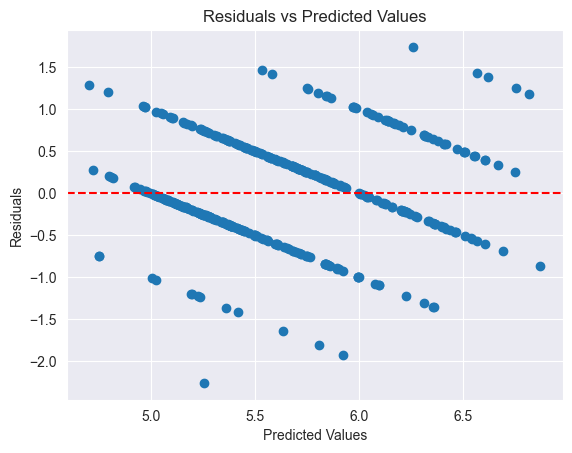

In [7]:

# Residual Analysis
plt.scatter(Y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

residuals = Y_test - y_pred
sns.displot(residuals, kind='kde')
plt.title("Residuals Distribution")
plt.show()

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [8]:

# Statistical Analysis using statsmodels
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)  # Add constant for intercept
X_test_sm = sm.add_constant(X_test)

# Fit the model
model = sm.OLS(Y_train, X_train_sm).fit()

# Summary of the regression model
print(model.summary())

# Predict on the test set
predictions = model.predict(X_test_sm)
print("Predictions on test set:", predictions)


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     59.35
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          6.09e-105
Time:                        22:29:39   Log-Likelihood:                -1191.7
No. Observations:                1199   AIC:                             2407.
Df Residuals:                    1187   BIC:                             2469.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6272      0.019    296.545      0.0